---
# 1. Project Overview 
---

# Bank Customer Churn Prediction - Part I  

### 📝 **Project Overview**  
This is **Part 1** of the **Bank Customer Churn Prediction** project, where we explore and analyze a dataset of **10,000 bank customers** to understand the key factors contributing to customer churn. The dataset, sourced from [Kaggle - Bank Customer Churn Dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) by Gaurav Topre, includes **demographic, financial, and behavioral variables** that help predict whether a customer will leave the bank.  

### 🎯 **Objective**  
- Analyze customer characteristics and their impact on churn.  
- Conduct **Exploratory Data Analysis (EDA)** to uncover key trends and correlations.  
- Process and transform categorical variables for future modeling.  
- Prepare the dataset for **machine learning modeling in Part 2**.  

### 🔍 **Scope of Part 1**  
This phase of the project **focuses on data exploration and preprocessing**, covering:  
1️⃣ **Project Introduction** → Defining objectives and business context.  
2️⃣ **Dataset Acquisition & Structure** → Understanding feature descriptions and data types.  
3️⃣ **Exploratory Data Analysis (EDA)** → Visualizing data distributions, feature correlations, and class imbalance.  
4️⃣ **Feature Engineering (Initial Phase)** → Handling missing values, categorical encoding, and outlier detection.  
   
###🚀 **What Will Be Added in Part 2?**  
- **Feature Selection**: Identifying the most relevant features for predictive modeling.  
- **Machine Learning Modeling**: Training and evaluating classifiers (e.g., Logistic Regression, Random Forest, XGBoost).  
- **Hyperparameter Tuning**: Optimizing model performance.  
- **Deployment (Optional)**: Creating an interactive dashboard or API for predictions.  

### 🛠 **Technologies & Tools Used**  
- **Programming:** Python (Pandas, NumPy, Scikit-learn)  
- **Data Visualization:** Matplotlib, Seaborn  
- **Feature Engineering:** One-Hot Encoding, Label Encoding, Variance Threshold  

This structured approach ensures that **Part 1 lays the foundation for machine learning modeling** in the next phase.

---
# 2. Dataset Download & Loading 
---

## 🔧 Setup  

For this project, we will be using the following Python libraries:  

- **pandas** → Data manipulation and analysis, essential for handling structured datasets.  
- **numpy** → Numerical computing, used for efficient mathematical operations.  
- **matplotlib** → Core visualization library for creating static plots and graphs.  
- **seaborn** → Statistical data visualization, used for creating enhanced plots and correlation analysis.  
- **sklearn.preprocessing (MinMaxScaler, StandardScaler)** → Feature scaling techniques for normalizing.  
- **sklearn.decomposition (PCA)** → Dimensionality reduction to extract key features from high-dimensional data.  
- **sklearn.ensemble (RandomForestClassifier)** → Machine learning model to evaluate feature importance and predict chrun.
- **sklearn.cluster (KMeans)** → Unsupervised machine learning algorithm used for clustering similar customers.
- **import plotly.express as px** → Library for interactive visualizations, simplifying the creation of dynamic charts.
- **from matplotlib.colors import to_hex** → Converts RGB colors to HEX format for consistent styling across plots.

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import plotly.express as px
from matplotlib.colors import to_hex

## Downloading 

To begin this project, we first need to load the dataset. The dataset is stored in a CSV file and can be read using `pandas`. 

In [374]:
bank = pd.read_csv("Bank_Customer_Churn_Prediction.csv")
df = bank.copy()
df.drop(['customer_id'],axis=1,inplace=True)

---
# 3. Dataset Structure
---

In [376]:
# Check if data are numerical or categorical and if we have missing information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Project Features Description

Below is a list of the features used in this project, along with their descriptions:

| **Feature**            | **Usage**             | **Description** |
|------------------------|----------------------|----------------|
| `customer_id`         | ❌ Unused Variable    | Unique customer identifier (account number). |
| `credit_score`        | ✅ Input Feature      | Customer's credit score. |
| `country`            | ✅ Input Feature      | Country of residence of the customer. |
| `gender`             | ✅ Input Feature      | Customer's gender (Male/Female). |
| `age`                | ✅ Input Feature      | Customer's age. |
| `tenure`             | ✅ Input Feature      | Number of years the customer has had an account in the bank. |
| `balance`            | ✅ Input Feature      | Customer's account balance. |
| `products_number`    | ✅ Input Feature      | Number of products the customer has with the bank. |
| `credit_card`        | ✅ Input Feature      | Whether the customer has a credit card (1 = Yes, 0 = No). |
| `active_member`      | ✅ Input Feature      | Whether the customer is an active member of the bank (1 = Yes, 0 = No). |
| `estimated_salary`   | ✅ Input Feature      | Customer's estimated salary. |
| `churn`             | 🎯 Target Variable    | 1 if the customer left the bank, 0 otherwise. |

**Note:** The `customer_id` is not used in the modeling process as it does not provide relevant information for predicting churn. 

In [378]:
# Checking Nan presence
#bank_data.isna().sum().max()
[print(col) for col in df if df[col].isna().sum() > 0 ]

[]

In [380]:
# Check for duplicate rows in the dataset
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


---
# 4. Exploratory Data Analysis (EDA) 
---

## **4.1 Target Variable Analysis - Churn**

In [382]:
# Count the number of chrun (1) and non-chrun (0) companies
print(df['churn'].value_counts())
print('-'* 30)
print( f"Churn ratio: {round(len(df[df["churn"] == 1]) / len(df["churn"])*100,1)}%" )  # Chrun ratio

churn
0    7963
1    2037
Name: count, dtype: int64
------------------------------
Churn ratio: 20.4%


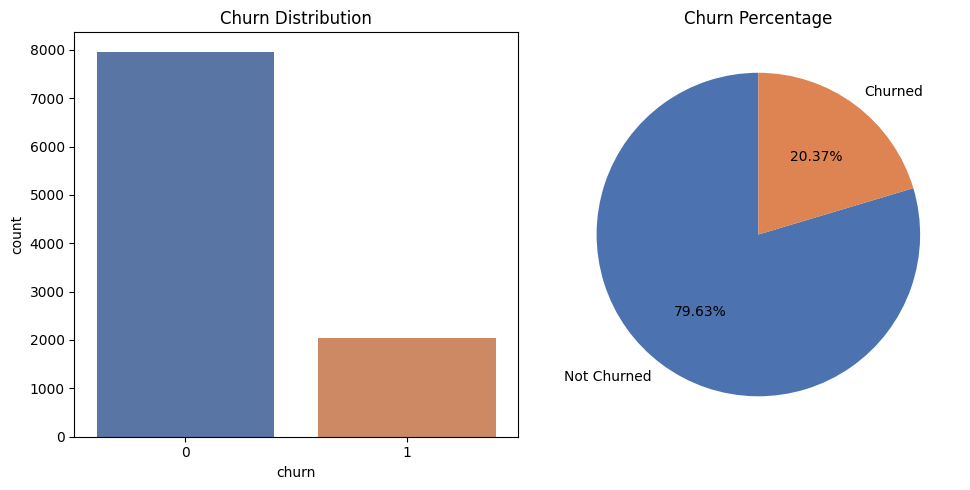

In [384]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
palette = sns.color_palette("deep")  # "deep" is the default palette for Seaborn
churn_colors = [to_hex(palette[0]), to_hex(palette[1])]

# Countplot for churn distribution
sns.countplot(x="churn", data=df, hue="churn", legend=False, ax=axes[0],  palette=churn_colors)
axes[0].set_title("Churn Distribution")

# Pie chart for churn distribution
sizes = df["churn"].value_counts()
labels = ["Not Churned", "Churned"]

axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=churn_colors)
axes[1].set_title("Churn Percentage")

# Show the plots
plt.tight_layout()
plt.show()

### Average Feature Values by Churn Status

In [390]:
features = df.select_dtypes(include=["number"]).keys()
features = features.drop('churn')
df.groupby('churn')[features].mean().style.background_gradient(cmap = "ocean")

## **4.2- Statistics and Distributions**

In [388]:
# Summary statistics of the dataset
df.describe().T.round(2)  # Transposed for better readability

count       mean       std     min       25%        50%  \
credit_score      10000.0     650.53     96.65  350.00    584.00     652.00   
age               10000.0      38.92     10.49   18.00     32.00      37.00   
tenure            10000.0       5.01      2.89    0.00      3.00       5.00   
balance           10000.0   76485.89  62397.41    0.00      0.00   97198.54   
products_number   10000.0       1.53      0.58    1.00      1.00       1.00   
credit_card       10000.0       0.71      0.46    0.00      0.00       1.00   
active_member     10000.0       0.52      0.50    0.00      0.00       1.00   
estimated_salary  10000.0  100090.24  57510.49   11.58  51002.11  100193.92   
churn             10000.0       0.20      0.40    0.00      0.00       0.00   

                        75%        max  
credit_score         718.00     850.00  
age                   44.00      92.00  
tenure                 7.00      10.00  
balance           127644.24  250898.09  
products_number        2.00       4.00  
credit_card            1.00       1.00  
active_member          1.00       1.00  
estimated_salary  149388.25  199992.48  
churn                  0.00       1.00

### Histograms

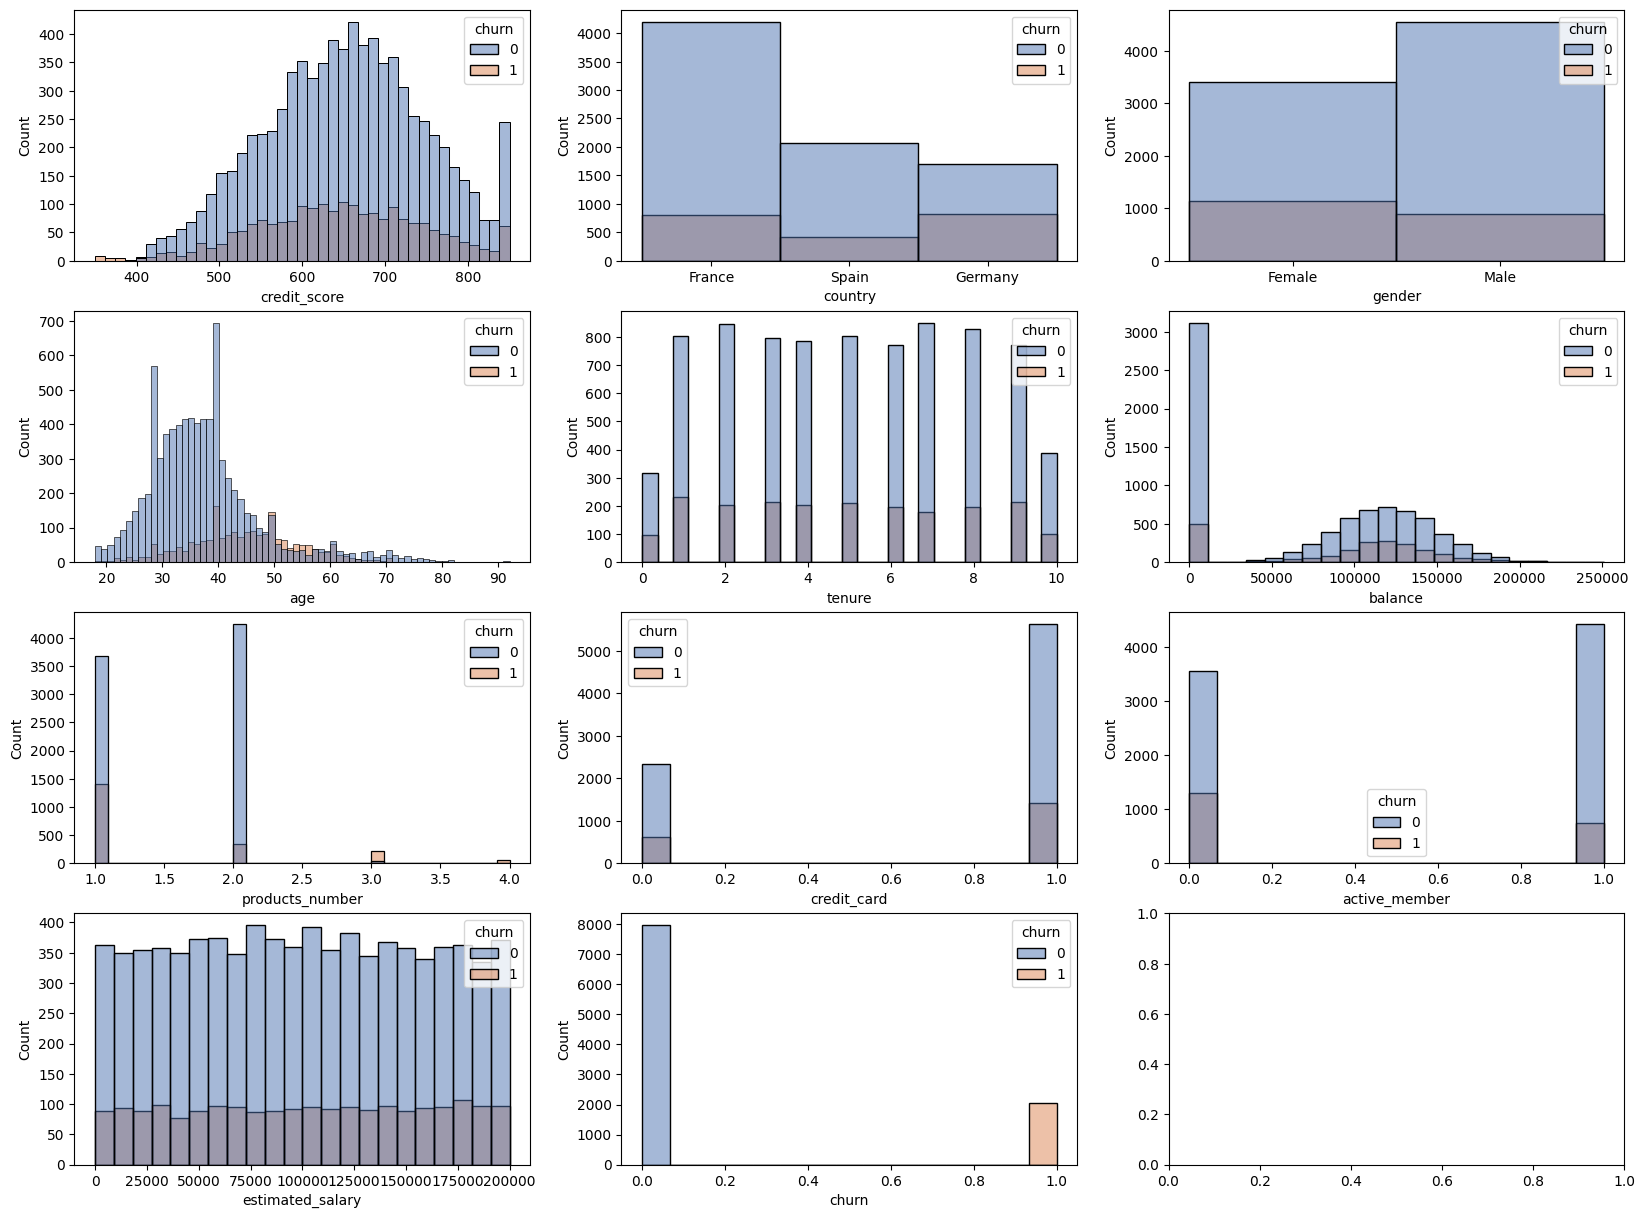

In [392]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
axs=axs.flat
for i in range(len(df.columns)):
    sns.histplot(data=df, x=df.columns[i],hue="churn", palette=churn_colors, ax=axs[i])

### Boxplots

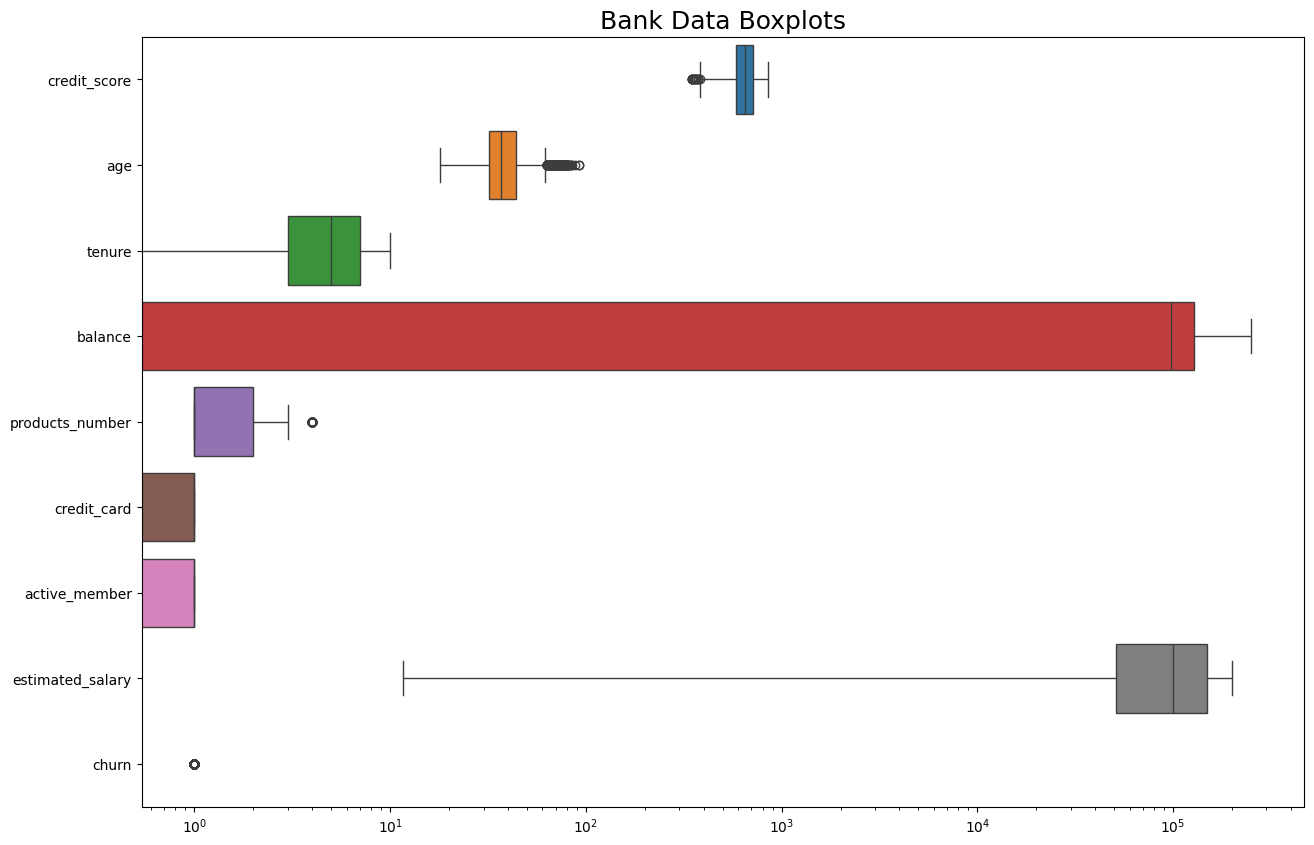

In [394]:
# Boxplot to identify outliers in numerical features
plt.figure(figsize = (15,10))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

### Boxplot and Outliers Analysis

In [396]:
def outliers_analysis(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to churn cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))
    print('-' * 65)
    
    return dataset

for col in df.select_dtypes(include=["number"]):
    new_df = outliers_analysis(df[col],str(col),df)

Quartile 25: 584.0 | Quartile 75: 718.0
iqr: 134.0
Cut Off: 201.0
credit_score Lower: 383.0
credit_score Upper: 919.0
credit_score outliers for close to churn cases: 15
-----------------------------------------------------------------
Quartile 25: 32.0 | Quartile 75: 44.0
iqr: 12.0
Cut Off: 18.0
age Lower: 14.0
age Upper: 62.0
age outliers for close to churn cases: 359
-----------------------------------------------------------------
Quartile 25: 3.0 | Quartile 75: 7.0
iqr: 4.0
Cut Off: 6.0
tenure Lower: -3.0
tenure Upper: 13.0
tenure outliers for close to churn cases: 0
-----------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 127644.24
iqr: 127644.24
Cut Off: 191466.36000000002
balance Lower: -191466.36000000002
balance Upper: 319110.60000000003
balance outliers for close to churn cases: 0
-----------------------------------------------------------------
Quartile 25: 1.0 | Quartile 75: 2.0
iqr: 1.0
Cut Off: 1.5
products_number Lower: -0.5
produ

### Age Analysis

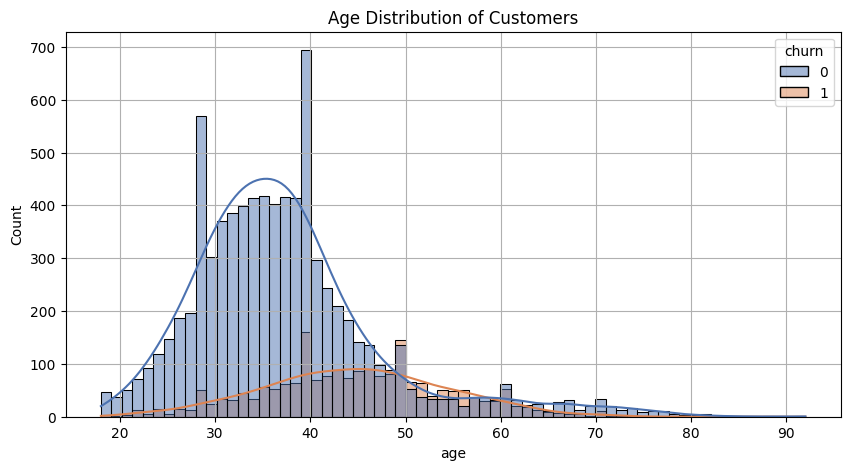

In [398]:
# Age plot
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=df.age, kde=True, hue="churn", palette=churn_colors)
plt.title('Age Distribution of Customers')
plt.grid()
plt.show()

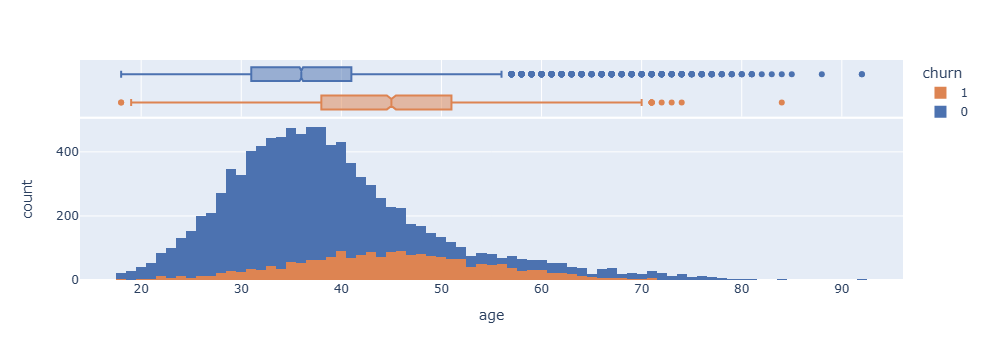

In [400]:
palette = sns.color_palette("deep")  # "deep" is the default palette for Seaborn
churn_colors2 = {0: to_hex(palette[0]), 1: to_hex(palette[1])}

# Criando o gráfico no Plotly
fig = px.histogram(df, x="age", color="churn", marginal="box", 
                   color_discrete_map= churn_colors2, hover_data=df.columns)
fig.show()

In [402]:
# Assuming df["price"] already exists
var= "age"
Q1 = df[var].quantile(0.25)  # First quartile (25%)
Q3 = df[var].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1                    # Interquartile range (IQR)
lower_whisker = max(0, Q1 - 1.5 * IQR)   # Lower whisker (boundary for non-outliers)
upper_whisker = Q3 + 1.5 * IQR           # Upper whisker (boundary for non-outliers)
price_null = df[var].isnull().sum()  # Count of missing values in "price"
median = df[var].median()

# Counting the number of units in each range
outliers_lower = len(df[df[var] < lower_whisker])  # Lower outliers
lower_whisker_units = len(df[(df[var] >= lower_whisker) & (df[var] < Q1)])  # Values between lower whisker and Q1
units_q1 = len(df[(df[var] >= Q1) & (df[var] < df[var].median())])  # Values between Q1 and median
units_median = len(df[df[var] == df[var].median()])  # Values equal to the median
units_q3 = len(df[(df[var] > df[var].median()) & (df[var] <= Q3)])  # Values between median and Q3
upper_whisker_units = len(df[(df[var] > Q3) & (df[var] <= upper_whisker)])  # Values between Q3 and upper whisker
outliers_upper = len(df[df[var] > upper_whisker])  # Upper outliers

# Creating a DataFrame with statistics and unit counts
quartile_df = pd.DataFrame({
    "Statistic": [
        "Lower Whisker", "Q1 (25%)", "Median (50%)", "Q3 (75%)", 
        "Upper Whisker", "Lower Outliers", "Upper Outliers", "Missing Values"
    ],
    "Age": [
        lower_whisker, Q1, median, Q3, 
        upper_whisker, "-", "-", "-"
    ],
    "Units": [
        lower_whisker_units, units_q1, units_median, units_q3, 
        upper_whisker_units, outliers_lower, outliers_upper, price_null
    ]
})

# Adding a cumulative sum column
quartile_df["Cumulative Sum"] = quartile_df["Units"].cumsum()
quartile_df

Statistic   Age  Units  Cumulative Sum
0   Lower Whisker  14.0   2372            2372
1        Q1 (25%)  32.0   2237            4609
2    Median (50%)  37.0    478            5087
3        Q3 (75%)  44.0   2573            7660
4   Upper Whisker  62.0   1981            9641
5  Lower Outliers     -      0            9641
6  Upper Outliers     -    359           10000
7  Missing Values     -      0           10000

In [404]:
len(df["age"][df["age"] > 62])

359

### Correlation matrix

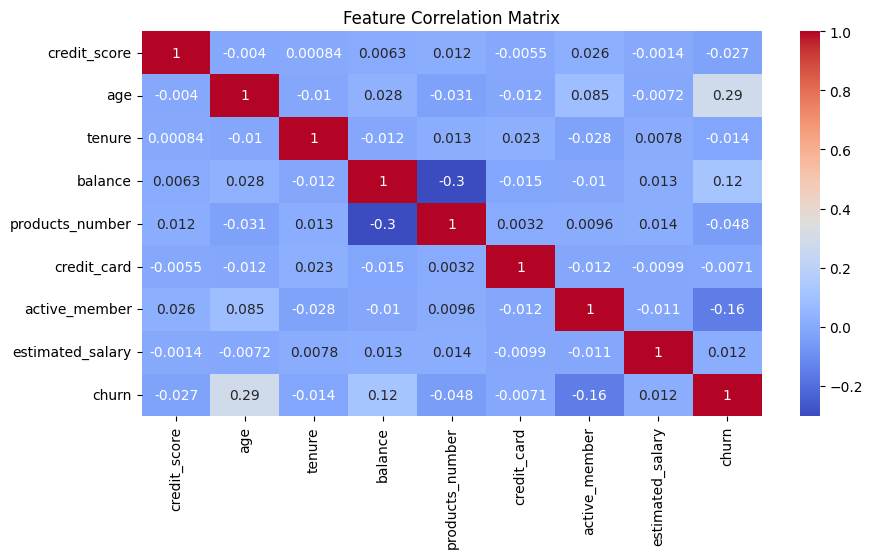

In [406]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

### Identifying Highly Correlated Features

In [410]:
# Compute correlation of all features with the target variable "Churn"
target_correlation = df.corr(numeric_only=True)["churn"].sort_values()
target_correlation

active_member      -0.156128
products_number    -0.047820
credit_score       -0.027094
tenure             -0.014001
credit_card        -0.007138
estimated_salary    0.012097
balance             0.118533
age                 0.285323
churn               1.000000
Name: churn, dtype: float64

## **4.3- Categorical Variables Analysis**

### One-Hot Encoding para a variável categórica "country"

The following command applies **One-Hot Encoding** to the `country` variable, creating binary columns for each country.
- pd.get_dummies() creates separate columns for each country.
- The drop_first=True parameter removes one category to avoid multicollinearity.
- France is implicit because we drop the first category.

**⚠️ Note:** Initially, we used `drop_first=False` to retain all categories for exploratory analysis. However, to avoid multicollinearity in machine learning models, it is recommended to set `drop_first=True`, which removes one category (e.g., "France") and prevents redundancy.


In [412]:
df["country"].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [414]:
df = pd.get_dummies(df, columns=["country"], drop_first=False) 

### Customer Churn by Country

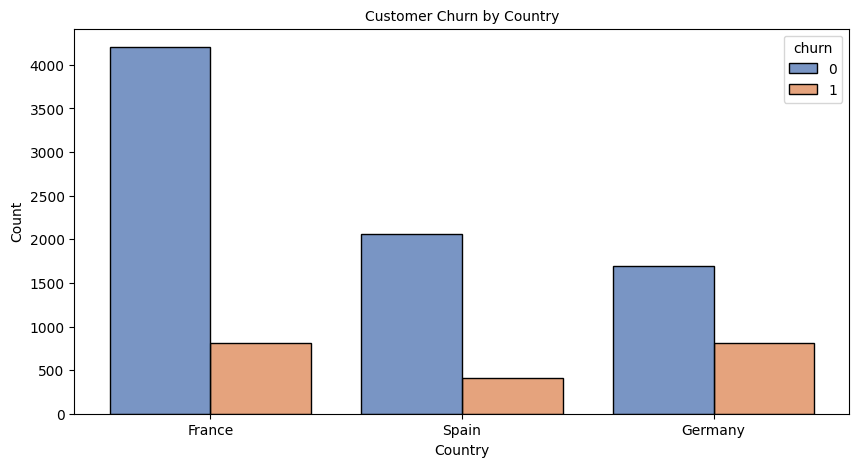

In [416]:
plt.figure(figsize=(10,5))
sns.histplot(data=bank, x="country", hue="churn", multiple="dodge", palette=churn_colors, shrink=0.8)

# Ajustes no gráfico
plt.title("Customer Churn by Country", fontsize=10)
plt.xlabel("Country", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

### Label Encoding for the binary variable "gender"

Since `gender` has **only two categories (`Male` and `Female`)**, the best method is **Label Encoding**: ({"Male": 0, "Female": 1})

In [418]:
df["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [420]:
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})

### Customer Churn by Gender

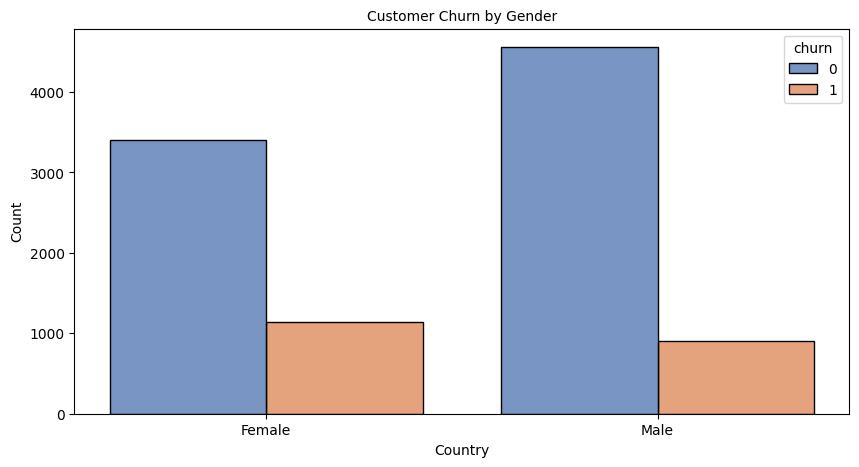

In [422]:
plt.figure(figsize=(10,5))
sns.histplot(data=bank, x="gender", hue="churn", multiple="dodge", palette=churn_colors, shrink=0.8)

# Ajustes no gráfico
plt.title("Customer Churn by Gender", fontsize=10)
plt.xlabel("Country", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

### Correlation matrix after categorical variables transformation

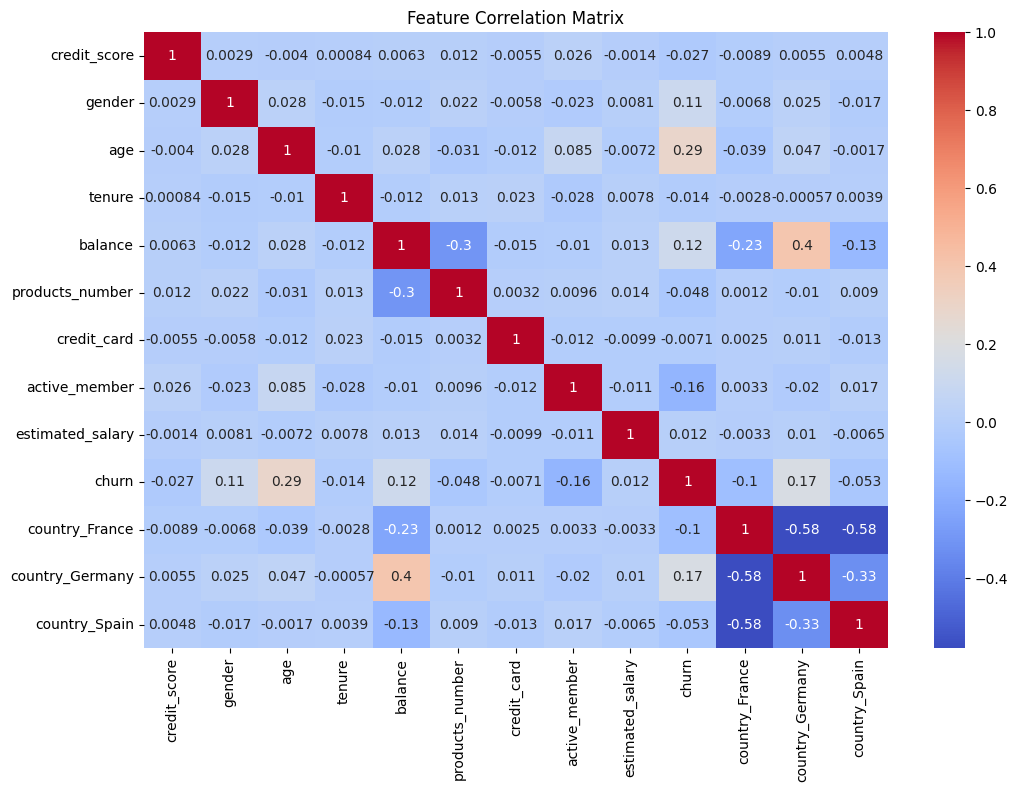

In [424]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

### Identifying Highly Correlated Features after categorical variables transformation

In [428]:
# Compute correlation of all features with the target variable "Churn"
target_correlation = df.corr(numeric_only=True)["churn"].sort_values()
target_correlation

active_member      -0.156128
country_France     -0.104955
country_Spain      -0.052667
products_number    -0.047820
credit_score       -0.027094
tenure             -0.014001
credit_card        -0.007138
estimated_salary    0.012097
gender              0.106512
balance             0.118533
country_Germany     0.173488
age                 0.285323
churn               1.000000
Name: churn, dtype: float64

## 4.4- Vizualization

### 4.4.1-  Pairplot for Key Features

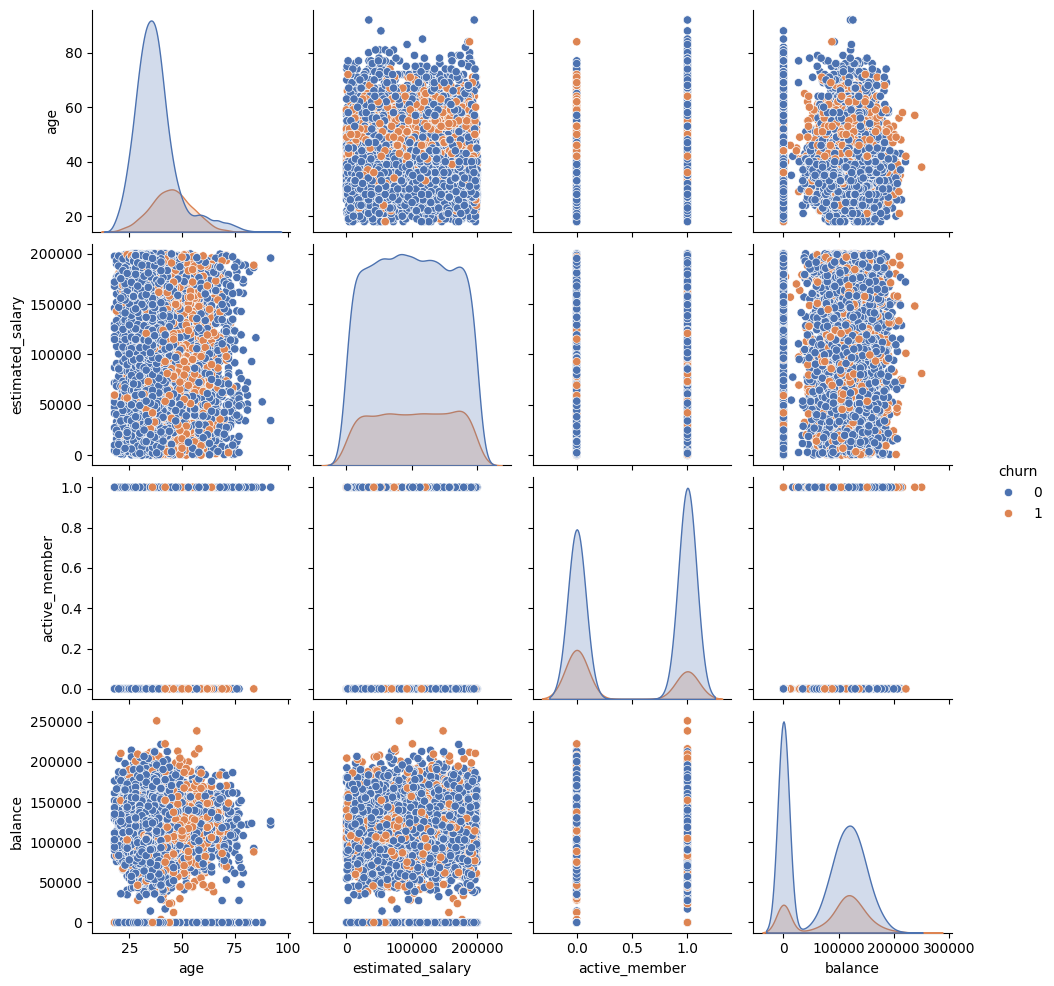

In [432]:
# Select the most representative financial indicators based on correlation
selected_features = [
    "age",               
    "estimated_salary",  
    "active_member",   
    "balance"  
]

sns.pairplot(df, vars=selected_features, hue="churn", diag_kind="kde", palette=churn_colors)
plt.show()

### 📊 Analysis of the First Row in the Pairplot

The first row of the pairplot visualizes the relationships between **age** and the other selected variables (`estimated_salary`, `active_member`, `balance`), with churn (`0` = stayed, `1` = churned) highlighted.

**1-️ Age Distribution (First Column)**
- The **kernel density estimate (KDE) plot** shows a peak around **32-45 years old**.
- Customers who churn (`orange points`) seem to be more concentrated in a specific age range, particularly around **40-50 years old**.
- There are very few younger customers who churn.

**2- Age vs. Estimated Salary**
- The scatterplot does not show a strong pattern between **age and estimated salary**.
- Churned customers (`orange points`) are **evenly spread across all salary levels**.
- This suggests that **estimated salary is not a strong predictor of churn**.

**3- Age vs. Active Member**
- The **active_member** variable is binary (`0` or `1`), creating two distinct horizontal clusters.
- There are **more churned customers (`orange`) in the inactive (`0`) category**, confirming its negative correlation with churn.
- Among active members (`1`), fewer churned cases appear.

**4- Age vs. Balance**
- The scatterplot does not show a clear trend between age and balance.
- Customers across all age groups have a wide range of balances, meaning balance does not strongly depend on age

**Key Takeaways**
- **Age plays a role in churn**, with **mid-aged customers (40-50 years) having a higher churn rate**.
- **Estimated Salary does not significantly impact churn**.
- **Inactive customers are more likely to churn**, reinforcing its predictive importance.
- **The relationship between balance and churn is not strongly evident from this visualization.**

These insights help in understanding churn behavior before proceeding to feature engineering and machine learning modeling.


### 4.4.2- Feature Importance Using Random Forest

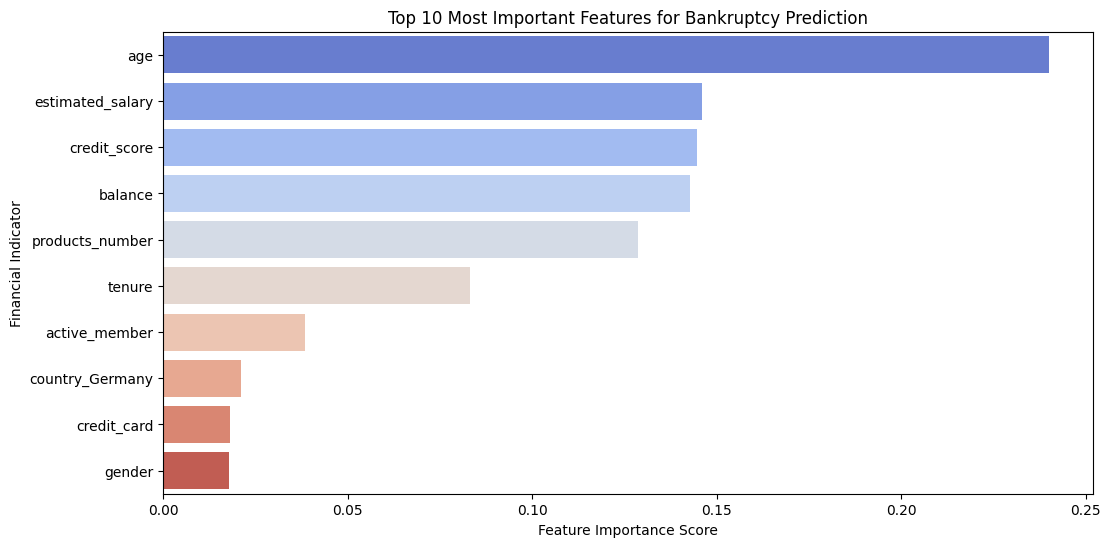


Features Importance:


In [348]:
# Define features and target variable
X = df.drop(columns=["churn"])
y = df["churn"]

# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], hue=feature_importance.index[:10], dodge=False, legend=False, palette="coolwarm")
plt.title("Top 10 Most Important Features for Bank Churn Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Indicator")
plt.show()

print("\nFeatures Importance:")
feature_df = feature_importance.to_frame().reset_index()
feature_df.columns = ["Feature", "Importance"]
styled_feature_df = feature_df.style.background_gradient(cmap="coolwarm")
styled_feature_df

### 4.4.3-  Principal Component Analysis (PCA) for Dimensionality Reduction

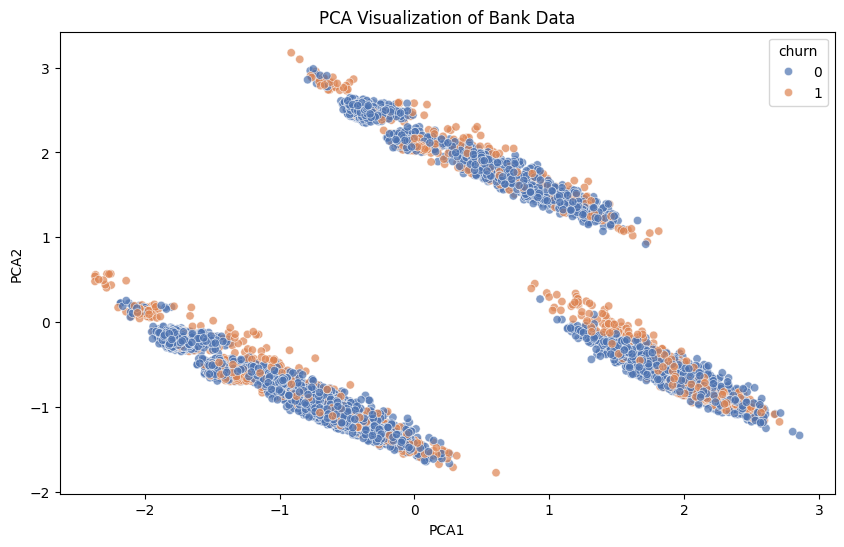

In [350]:
# Standardize features before PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["churn"]))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Convert to DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
df_pca["churn"] = df["churn"]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="churn", data=df_pca, palette=churn_colors, alpha=0.7)
plt.title("PCA Visualization of Bank Data")
plt.show()

In [352]:
# Retrieve the PCA component loadings (how features contribute to each principal component)
pca_loadings = pd.DataFrame(pca.components_, columns=df.drop(columns=["churn"]).columns, index=["PCA1", "PCA2"])
print(pca_loadings.T)  # Transpose for better readability

                      PCA1      PCA2
credit_score      0.010666  0.016238
gender            0.011870 -0.017871
age               0.080644 -0.013503
tenure           -0.008512  0.019416
balance           0.489983 -0.313445
products_number  -0.181793  0.207922
credit_card      -0.006192 -0.016717
active_member    -0.014357  0.041406
estimated_salary  0.012638 -0.014296
country_France   -0.594009 -0.455806
country_Germany   0.599500 -0.239256
country_Spain     0.085947  0.768230


### PCA Visualization of Bank Data

**What is PCA?**
**Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible. It works by identifying the **principal components** (linear combinations of original features) that explain the most variability in the dataset.

**In this case:**
- Standardization (StandardScaler) was applied before PCA to ensure all features are on the same scale.
- PCA was used to reduce the dataset to 2 components (`PCA1` and `PCA2`), allowing for visualization in a 2D space.

**Analysis of the PCA Scatter Plot**
- Each point represents a customer, where the color indicates their **churn status** (`0` = stayed, `1` = churned).
- The data appears to be structured into three distinct diagonal clusters, suggesting that the original features contain patterns that segment customers into groups.
- Churned customers (`orange`) are spread across all clusters, meaning that PCA alone does not completely separate churned from non-churned customers.
- However, there are regions with a slightly higher density of churn cases, which indicates that certain feature combinations are more predictive of churn.
- Since PCA focuses only on variance, further supervised learning techniques (e.g., logistic regression, decision trees) are needed to fully classify churn.

**Key Takeaways**
    
✔ PCA helps visualize the dataset structure, revealing possible customer groupings.  
✔ Churn cases are not entirely separable in PCA space, implying that churn is influenced by multiple factors that may not be fully captured in only two dimensions.  

**Analyzing Feature Importance in the Original Space**
    
Since PCA transforms the original features into new components, we lose interpretability of individual feature contributions. To regain this, we can:

- Check the PCA Component Loadings (Eigenvectors)
- These tell us how much each original feature contributes to PCA1 and PCA2.
- The values in the PCA loadings matrix indicate how much each original feature influences each principal component.
- These values are not correlation coefficients, but rather weights showing how much variance of a feature is captured by PCA1 and PCA2.
- Large absolute values mean the feature contributes strongly to PCA, but not necessarily to churn prediction.
- To understand feature relevance for churn, use correlation or feature importance from models like Random Forest.

Features with high absolute values in a principal component are more influential.

**PCA vs Random Forest**

- PCA tells us which features explain variance but not necessarily which features are best for prediction.
- A Random Forest model directly measures predictive power of each feature.

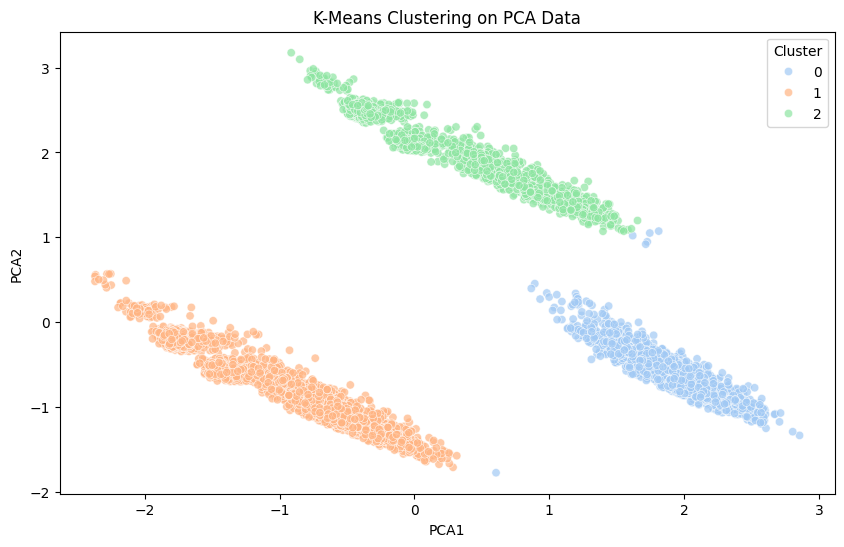

In [356]:
# Apply K-Means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(pca_result)  # Add cluster labels

# Plot K-Means Clustering (Correcting the Hue Parameter)
plt.figure(figsize=(10,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_pca, palette="pastel", alpha=0.7)
plt.title("K-Means Clustering on PCA Data")
plt.show()

### **K-Means Clustering on PCA Data - Interpretation**

**K-Means** is a popular clustering algorithm that groups data points into `k` clusters based on feature similarity. It assigns each point to the nearest cluster centroid, iteratively refining the clusters to minimize variance within them. In this analysis, K-Means is applied to PCA-transformed data, helping identify distinct customer segments and potential patterns related to churn.

**What does this graph show?**
This plot represents **K-Means clustering** applied to **PCA-transformed bank customer data**. The three clusters (`0`, `1`, and `2`) group similar customers based on financial behavior.

#**What do clusters 0, 1, and 2 mean?**
- The clusters don’t have predefined meanings but likely represent **different financial profiles**.
- Possible interpretations:
  - **Cluster 0** → High-balance, low-risk customers.
  - **Cluster 1** → Mid-range financial activity.
  - **Cluster 2** → Low-balance, potentially high churn risk.

**Key Insights**
    
✔ The clusters are **well-separated**, indicating clear behavioral patterns.  
✔ Further analysis is needed to **link clusters with churn rates**.  
✔ Investigating **feature distributions within clusters** can reveal meaningful patterns.